In [8]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

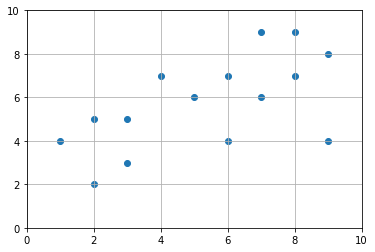

In [3]:
dataset = np.array([[1, 4], [2, 2], [2, 5], [3, 3], [3, 5], [4, 7], [5, 6], [6, 4], [6, 7], [7, 6], [7, 9], [8, 7], [8, 9], [9, 4], [9, 8]])

plt.scatter(dataset[:, 0], dataset[:, 1])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()

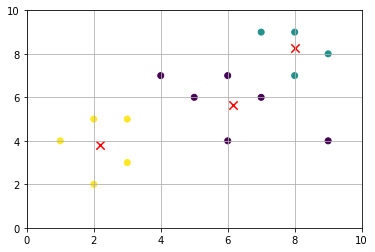

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:, 0], dataset[:, 1], c=pred_y)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='red', marker='x');

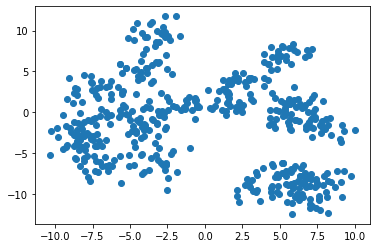

In [16]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1]);

In [17]:
## Retorna o número ótimo de clusters

def optimal_number_of_clusters(wcss):
  x1, y1 = 1, wcss[0]
  x2, y2 = 19, wcss[len(wcss) - 1]
  distances = []
  for i in range(len(wcss)):
    x0 = i + 1
    y0 = wcss[i]
    numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denominator = sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
    distances.append(numerator / denominator)

  return distances.index(max(distances)) + 1

In [18]:
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


n = optimal_number_of_clusters(wcss)
print(n)

4


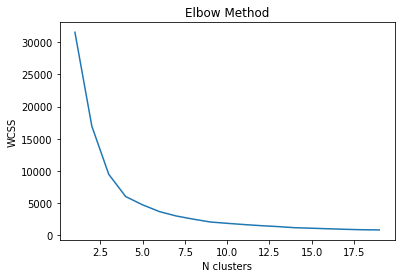

In [19]:
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('N clusters')
plt.ylabel('WCSS');

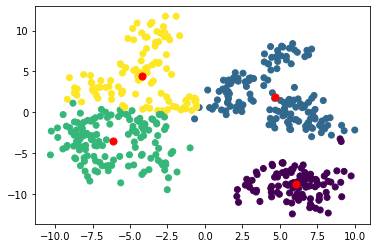

In [20]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red');

In [22]:
# Retorna as coordenadas dos centróides (X, Y)
print(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

[ 6.07279058  4.6799272  -6.10635026 -4.18061418] [-8.8012785   1.81951975 -3.5270784   4.39438299]
